The provided Python code is exclusively compatible with the Python Sagemath environment. It's essential to emphasize that the line $\textbf{from sage.all import *}$ functions solely within a Python environment equipped with Sagemath installation.

In [1]:
import sys
from sage.all import *
from sympy import Function, Symbol,symbols,cancel,N,sqrt,Rational
import numpy as np
from scipy.special import comb
import time
import sympy as sp
import matplotlib.pyplot as plt
from math import gcd
from decimal import *
getcontext().prec = 3


In [2]:
x=Symbol('x')
t=Symbol('t')
y=Symbol('y')
f= Function('f')
# define the varaible and function

In [3]:
def split_equation1(Equation):
    if len(Equation.args)==0:
        return "This functional inequality does not belong to class (1)"
    u=0
    try:
        output=set()
        if len((Equation.expand()).operands())==1:
            output.add(Equation)
        elif len((Equation.expand()).operands()) != 1:
            for i in (Equation.expand()).operands():
                if len(i.operands())==0:
                    output.add(Equation)   
    except:
        output=set()
        if len((Equation.expand()).args)==1:
            output.add(Equation)
        elif len((Equation.expand()).args) != 1:
            for i in (Equation.expand()).args:
                if len(i.args)==0:
                    output.add(Equation)
        
    return list(output)
def split_equation2(Equation):
    try:
        terms=Equation.expand()
        termss= list(terms.operands())
        n=len(termss)
        output=[]
    except:
        terms=Equation.expand()
        termss= list(terms.args)
        n=len(termss)
        output=[]
    if n==1:
        output.append(terms)
    else:
        for i in range(n):
            output.append(termss[i].expand())
    return output
def split_equation(Equation):
    if split_equation1(Equation)== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    if len(split_equation1(Equation))!=0:
        return split_equation1(Equation)
    else:
        return split_equation2(Equation)
def check1(split_form1):
    check=[]
    for i in split_form1:
        if i.has(f) and len(i.args)==1:
            check.append(i)
        elif i.has(f) and len(i.args) == 2:
            ur=0
            for j in i.args:
                if len(j.args)==2 and x not in i.args and y not in i.args:
                    ur = ur + 1
            if ur ==1 :
                check.append(i)
            ur=0
            for j in i.args:
                if len(j.args)==0 and x not in i.args and y not in i.args:
                    ur = ur + 1
            if ur ==1 :
                check.append(i)
        elif i.has(f) and len(i.args) == 3:
            ur=0
            for j in i.args:
                if len(j.args)==0 and x not in i.args and y not in i.args:
                    ur = ur + 1
            if ur ==1 :
                check.append(i)
    if len(check) == len(split_form1):
        return split_form1
    else:
        return "This functional inequality does not belong to class (1)"

In [4]:
def Left_hand_side(split_form):
    L=0
    ll=set()
    for i in split_form:
        ll.add(i)
    for i in ll:
        L= L +i                                                     
    return L,0

def Left_hand_side_coeff(Eq):
    ll=[]
    if Eq[0]==0:
        return 0
    else:
        try:
            z=0
            left=Eq[0].args
            for i in left:
                if i.coeff(x) !=0 or i.coeff(y) !=0:
                    l=[]
                    l.append(1)
                    l.append(i.coeff(x))
                    l.append(i.coeff(y))
                    ll.append(l)
                    l=[]
                elif len(i.args)==0:
                    l=[]
                    l.append(i)
                    for j in left:
                        if len(j.args) != 0:
                            for k in j.args:
                                l.append(k.coeff(x))
                                l.append(k.coeff(y))
                                ll.append(l)
                                l=[]
            for i in left:
                if len(i.args)!=0:
                    z= z +1
            if z > 1:
                for i in left:
                    if len(i.args)==1:
                        l=[]
                        l.append(1)
                        for j in i.args:
                            l.append(j.coeff(x))
                            l.append(j.coeff(y))
                            ll.append(l)
                            l=[]
                    elif len(i.args)== 2:
                        l=[]
                        for j in i.args:
                            if len(j.args) ==0:
                                l.append(j)
                        for j in i.args:
                            if len(j.args) ==2:
                                l.append(j)
                        for j in i.args:
                            if len(j.args) == 1:
                                for k in j.args:
                                    l.append(k.coeff(x))
                                    l.append(k.coeff(y))
                                    ll.append(l)
                                    l=[]
                    elif len(i.args)== 3:
                        l=[]
                        co=0
                        for j in i.args:
                            if len(j.args) ==0:
                                co=co+j
                        for j in i.args:
                            if len(j.args) == 2:
                                co=co*j
                        l.append(co)
                        for j in i.args:
                            if len(j.args) == 1:
                                for k in j.args:
                                    l.append(k.coeff(x))
                                    l.append(k.coeff(y))
                                    ll.append(l)
                                    l=[]
                    
        except:
            z=0
            left=Eq[0].operands()
            for i in left:
                if i.coefficient(x) !=0 or i.coefficient(y) !=0:
                    l=[]
                    l.append(1)
                    l.append(i.coefficient(x))
                    l.append(i.coefficient(y))
                    ll.append(l)
                    l=[]

                elif len(i.operands())==0:
                    l=[]
                    l.append(i)
                    for j in left:
                        if len(j.operands()) != 0:
                            for k in j.operands():
                                l.append(k.coefficient(x))
                                l.append(k.coefficient(y))
                                ll.append(l)
                                l=[]
            for i in left:
                if len(i.operands())!=0:
                    z= z +1
            if z > 1:
                for i in left:
                    if len(i.operands())==1:
                        l=[]
                        l.append(1)
                        for j in i.operands():
                            l.append(j.coefficient(x))
                            l.append(j.coefficient(y))
                            ll.append(l)
                            l=[]
                    elif len(i.operands())== 2:
                        l=[]
                        for j in i.operands():
                            if len(j.operands()) ==0:
                                l.append(j)
                        for j in i.operands():
                            if len(j.operands()) ==2:
                                l.append(j)
                        for j in i.operands():
                            if len(j.operands()) == 1:
                                for k in j.operands():
                                    l.append(k.coefficient(x))
                                    l.append(k.coefficient(y))
                                    ll.append(l)
                                    l=[]  
                    elif len(i.operands())== 3:
                        l=[]
                        co=0
                        for j in i.operands():
                        
                            if len(j.operands()) ==0:
                                co=co+j
                        for j in i.operands():
                            if len(j.operands()) == 2:
                                co=co*j
                        l.append(co)
                        for j in i.operands():
                            if len(j.operands()) == 1:
                                for k in j.operands():
                                    l.append(k.coefficient(x))
                                    l.append(k.coefficient(y))
                                    ll.append(l)
                                    l=[]
    return ll

def sum_same_elements(input_array):
    sum_dict = {}
    # Step 1: Store the sum of last two elements and the corresponding first element in the dictionary
    for inner_array in input_array:
        key = tuple(inner_array[1:])  # Using tuple to use as dictionary key
        if key in sum_dict:
            sum_dict[key] += inner_array[0]
        else:
            sum_dict[key] = inner_array[0]
    # Step 2: Create the result array from the dictionary
    result_array = [[value, *key] for key, value in sum_dict.items()]
    return result_array

In [23]:
def Linear_inequality(Equation):
    start_time = time.time()
    split=split_equation(Equation)
    if split== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    split_form=check1(split)
    if split_form== "This functional inequality does not belong to class (1)":
        return "This functional inequality does not belong to class (1)"
    Eq=Left_hand_side(split_form)
    lhh= Left_hand_side_coeff(Eq)
    lh=sum_same_elements(lhh)
#     print(lh)
    total=0
    list1=[]
    list2=[]
    nega=[]
    for row in np.array(lh):
        total=row[0]+total
    for i in range(np.array(lh).shape[0]):
        if np.array(lh)[i][0] < 0:
            nega.append(np.array(lh)[i][0])
        if np.array(lh)[i][1] < 0:
            nega.append(np.array(lh)[i][1])
        if np.array(lh)[i][2] < 0:
            nega.append(np.array(lh)[i][2])
#     if len(nega)!=0:
#         return "This functional inequality does not belong to class (1)"
    
    if round(total,1) != 0:
        return "This functional inequality does not belong to class (1)"
#     else:
#     print(nega)
    for row in np.array(lh):
        list1.append(row[1]+row[2])
    for i in list1:
        if i ==1 :
            list2.append(i)
    comp=0  
    if len(list1)==len(list2):
        x, y = symbols('x y')
        left = 0
        i=1
        rounded_array = np.around(np.array(lh).astype(np.double),12)
        continue_process = True
        while continue_process:
            for item in rounded_array:
                # Create the expression
                expr = item[1] * x + item[2] * y
                # Compute the square of the expression multiplied by the first element of the row
                squared_expr = item[0] * expr**i
                # Add the squared expression to left
                left += squared_expr
            # Expand the final expression
            expanded_left = sp.expand(left)
            # Set the precision of the coefficients to at most 10 decimal points
            expanded_left_precise = expanded_left.evalf(10)
            # Define a threshold for small coefficients
            threshold = 1e-10

            # Round small coefficients to zero
            def round_small_coeffs(expr, threshold):
                return expr.xreplace({n: 0 for n in expr.atoms(sp.Number) if abs(n) < threshold})

            rounded_expr = round_small_coeffs(expanded_left_precise, threshold)
            if rounded_expr==0:
                i+=1
                continue
            else:
                continue_process= False
        if not continue_process:
            comp=comp+i-1
#             exists_row = False
#         for row in np.array(lh):
#                 if np.array_equal(row[-2:], [0, 1]):
#                     exists_row = True
#                     break
        
    array_new_s=np.array(lh)
    cdf_new_s=[]
    rounded_array_new_s = np.around(array_new_s.astype(np.double),5)
    for ii in range(array_new_s.shape[0]):
        try:
            rl1=cancel(((rounded_array_new_s[ii][1]-1)*x + rounded_array_new_s[ii][2]*y)/(y-x))
            cdf_new_s.append(round(sp.simplify(rl1),5))
        except:
            rl1=cancel(((array_new_s[ii][1]-1)*x + array_new_s[ii][2]*y)/(y-x))
            cdf_new_s.append(round(rl1,5))
    sorted_indices_new_s = sorted(range(len(cdf_new_s)), key=lambda kk: cdf_new_s[kk])
#     CDF_F_new_s = [cdf_new_s[i] for i in sorted_indices]
   
    sorted_array_new_s = [array_new_s[iv] for iv in sorted_indices_new_s]
#     print(sorted_array_new_s)
#     print(sorted_array_new_s[-1][0])
    
    
    if sorted_array_new_s[-1][0] <0:
        print("By Step 1, every solution of the functional inequality must be a {}-convex functions.".format(i - 1))
        print()
    else:
        print("By Step 1, every solution of the functional inequality must be a {}-concave functions.".format(i - 1))
        print()
    if len(list1) != len(list2):
        return "This functional inequality does not belong to class (1)"
    elif len(list1)==len(list2):
        array=np.array(lh)
        if array.shape[0]==1:
            if array[0][1]!=1:
                array = np.vstack([array, [0,1,0]])
            if array[0][2]!=1:
                array = np.vstack([array, [0,0,1]])
        if array.shape[0]==2:
            if array[0][1]!=1and array[1][1]!=1:
                array = np.vstack([array, [0,1,0]])
            if array[0][2]!=1 and array[1][2]!=1:
                array = np.vstack([array, [0,0,1]])
        if array.shape[0]>2:
            has_number_one = np.any(array[:, 1] == 1)
            has_number_t = np.any(array[:, 2] == 1)
            if not has_number_one:
                array = np.vstack((array, [0, 1, 0]))
            if not has_number_t:
                array = np.vstack((array, [0, 0, 1]))
        cdf=[]
        x_axis=[]
        rounded_array1 = np.around(array.astype(np.double),5)
        for i in range(array.shape[0]):
            try:
                rl1=cancel(((rounded_array1[i][1]-1)*x + rounded_array1[i][2]*y)/(y-x))
                x_axis.append(str((rounded_array1[i][1])*x + (rounded_array1[i][2])*y))
                cdf.append(round(sp.simplify(rl1),5))
            except:
                rl1=cancel(((array[i][1]-1)*x + array[i][2]*y)/(y-x))
                x_axis.append(str((array[i][1])*x + (array[i][2])*y))
                cdf.append(round(rl1,5))
    
    sorted_indices = sorted(range(len(cdf)), key=lambda k: cdf[k])
    CDF_F = [cdf[i] for i in sorted_indices]
   
    sorted_array = [array[i] for i in sorted_indices]
    cdq=[]
    xas=[]
    cdq1=[]
    xas1=[]
    arp=np.array(sorted_array.copy())
    cfdr=CDF_F.copy()
    xac=[]
    yarc=[]
    xad=[]
    yad=[]
    for i in range(1,arp.shape[0]):
        yarc.append(sum([arp[k][0] for k in range(i)]))
        yarc.append(sum([arp[k][0] for k in range(i)]))
        xac.append(arp[i-1][2])
        xac.append(arp[i][2])
    if len(xac)>2:
        for i in range(1,len(xac)-1):
            xad.append(xac[i])
            yad.append(yarc[i])
    xas3=[0,1]
    cdq3=[0,0]
    def mystep(x,y, ax=None, where='post', **kwargs):
        assert where in ['post', 'pre']
        x = np.array(x)
        y = np.array(y)
        if where=='post': y_slice = y[:-1]
        if where=='pre': y_slice = y[1:]
        X = np.c_[x[:-1],x[1:],x[1:]]
        Y = np.c_[y_slice, y_slice, np.zeros_like(x[:-1])*np.nan]
        if not ax: ax=plt.gca()
        return ax.plot(X.flatten(), Y.flatten(), **kwargs)
    plt.figure(figsize=(8, 6))
    mystep(xac,yarc, color="red", label=' CDF of the left-hand side')
    plt.plot(xad, yad, color='red',linestyle='dashed')
    plt.plot(xas3,cdq3,label=' CDF of the right hand side', color='blue')
    plt.grid()
    plt.legend(loc='upper left')
    plt.title('The cumulative distribution functions connected with the left and right hand sides of the functional inequality', fontweight='bold')
    plt.show()
    crp=0
    valu=[]
    sorted_array=np.array(sorted_array)


    for i in  range(1, len(CDF_F)):
        if round(sum([sorted_array[j][0] for j in range(i)]),5)< 0 and\
        round(sum([sorted_array[j][0] for j in range(i +1)]),5) > 0:
            crp=crp+1

            valu.append(CDF_F[i])

    for i in  range(1, len(CDF_F)):
        if round(sum([sorted_array[j][0] for j in range(i)]),5) > 0 and \
        round(sum([sorted_array[j][0] for j in range(i)]),5) < 0 :
            crp=crp+1
            valu.append(sum([sorted_array[j][0] for j in range(i)]))

    if len(nega)!=0:
        for i in  range(1, len(CDF_F)):
            if round(sum([sorted_array[j][0] for j in range(i)]),5)> 0 and\
            round(sum([sorted_array[j][0] for j in range(i +1)]),5) < 0:
                crp=crp+1

                valu.append(CDF_F[i])

    print("From Step 2, we obtain the number of the crossing points of these functions to be ",crp,".", sep="")
    print()
    if comp==crp:
        exists_row = False
        for row in np.array(lh):
            if np.array_equal(row[-2:], [0, 1]):
                exists_row = True
                break
        if  sorted_array_new_s[-1][0] <0:
            print("Since the number of crossing points is equal to ", comp,\
              " then we know that the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
            print()
        else:
            print("Since the number of crossing point is equal to ", comp,\
              " then we know that the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
            print()
    elif crp < comp:
        print("The number of crossing point is less than ", comp,sep="")
        print()
    elif crp > comp:
        ab1=np.array(lh)
        tr=[]
        for i in range(ab1.shape[0]):
            tr2=cancel(((ab1[i][1]-1)*x + ab1[i][2]*y)/(y-x))
            tr.append(N(tr2,1))
        sorted_ind = sorted(range(len(tr)), key=lambda k: tr[k])
    
        sorted_arr = [ab1[i] for i in sorted_ind]
        Ab=np.array(sorted_arr.copy())
        #print(Ab)
        inte=[]
        for i in range(Ab.shape[0]):
            inte.append(sum([Ab[j][0] for j in range(i+1) ]))
        
        for i in range(comp):
            list1=[]
            for j in range(len(inte)):
                if j==0:
                    resu=sp.integrate(inte[j],(t,Ab[j][2],t))
                    list1.append(cancel(resu))
                elif j>0:
                    g=0
                    try:
                        for k in range(j):
                            resu=inte[k]
                            g=g+sp.integrate(resu,(t,Ab[k][2],Ab[k+1][2]))
                        g=g+sp.integrate(inte[j],(t,Ab[j][2],t))
                        list1.append(cancel(g))
                    except:
                        for k in range(j):
                            resu=inte[k]
                            g=g+sp.integrate(resu,(t,Ab[k][2],Ab[k+1][2]))
                        g=g+sp.integrate(inte[j],(t,Ab[j][2],t))
                        list1.append(g)
                
            inte=list1
        G_1=inte.copy()
        F_1=[]
        F_a=[]
        ff=0
        for j in range(comp):
            ff=sp.integrate(ff,(t,0,t))
        F_a.append(cancel(ff))
        for i in range(len(G_1)):
            F_1.append(F_a[0])
        n_G=[]
        n_F=[]
        for i in range(1, Ab.shape[0]):
            n_G.append(round(G_1[i-1].subs(t,Ab[i][2]),5))
            n_F.append(round(F_1[i-1].subs(t,Ab[i][2]),5))
        s_p=0
        s_n=0
        for i in (np.array(n_F)-np.array(n_G)):
            if i>=0:
                s_p=s_p +1
        for i in (np.array(n_F)-np.array(n_G)):
            if i<=0:
                s_n=s_n + 1
        if s_p != len(np.array(n_F)-np.array(n_G)) and s_n != len(np.array(n_F)-np.array(n_G)):
            print("By Step 3, the functional inequality is not satisfied  by all {}-convex function.".format(comp,comp), sep="")
            print()
        else:
            local_m=[]
            for i in range(len(F_1)):
                local_m.append(F_1[i]-G_1[i])
            critical_po=[]
            # Calculate the first derivative of the function
            for i in range(0,len(local_m)-1):
                derivative = sp.diff(local_m[i], t)
            # Find the critical points by solving the equation derivative = 0
                critical_points = sp.solve(derivative, t)
                real_critical_points = [point for point in critical_points if point.is_real]
                interval_critical_points = [point for point in real_critical_points if Ab[i][2] < point < Ab[i+1][2]]
                critical_po.append(interval_critical_points)
            s_np=0
            s_nn=0
            for i in range(0, len(critical_po)):
                if len(critical_po[i])==0:
                    s_np=s_np+1
                else:
                    if local_m[i].subs(t,critical_po[i][0])>=0:
                        s_np=s_np+1
            for i in range(0, len(critical_po)):
                if len(critical_po[i])==0:
                    s_nn=s_nn+1
                else:
                    if local_m[i].subs(t,critical_po[i][0])<=0:
                        s_nn=s_nn+1
            if s_p==s_np== len(critical_po) :
                exists_row = False
                for row in np.array(lh):
                    if np.array_equal(row[-2:], [0, 1]):
                        exists_row = True
                        break
                if  sorted_array_new_s[-1][0] <0:
                    print("By Step 3, the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
                    print()
                else:
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
            elif s_n==s_nn== len(critical_po) :
                exists_row = False
                for row in np.array(lh):
                    if np.array_equal(row[-2:], [0, 1]):
                        exists_row = True
                        break
                if  sorted_array_new_s[-1][0] <0:
                    print("By Step 3, the functional inequality is satisfied by every {}-convex function f.".format(comp), sep="")
                    print()
                else:
                    print("By Step 3, the functional inequality is satisfied by every {}-concave function f.".format(comp), sep="")
                    print()
            else:
                print("By Step 3, the functional inequality is satisfied neither by all {}-convex function nor by all {}-concave function.".format(comp,comp), sep="")
                print()

    print("- The time taken to solve the problem is %s seconds -" % round(time.time() - start_time, 2))
       
       

**Example 3:**  Consider the inequality $C_3(f) \leq L_4(f),$ that is,
<br>
$$\textstyle \frac{1}{3}\left[f\left(\frac{2+\sqrt2}{4}x+\frac{2-\sqrt2}{4}y\right) +f\left(\frac{x+y}{2}\right)+ f\left(\frac{2-\sqrt2}{4}x+\frac{2+\sqrt2}{4}y\right)\right] -\frac{1}{12}\left(f(x)+f(y)\right) - \frac{5}{12}\left[f\left(\frac{5+\sqrt5}{10}x + \frac{5-\sqrt5}{10}y\right) + f\left(\frac{5-\sqrt5}{10}x + \frac{5+\sqrt5}{10}y\right)\right]\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



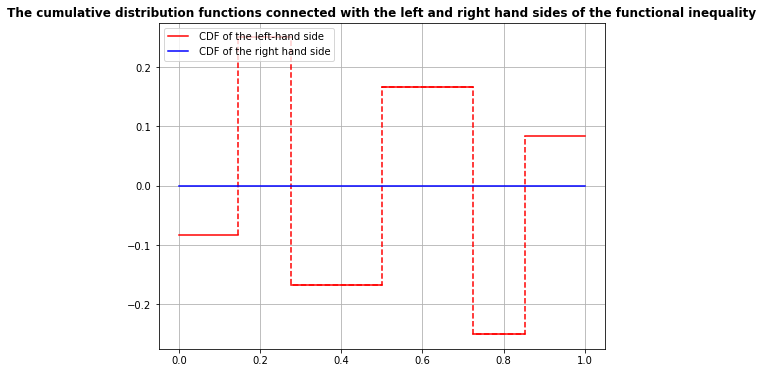

From Step 2, we obtain the number of the crossing points of these functions to be 5.

By Step 3, the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 9.75 seconds -


In [6]:
Linear_inequality((1/3)*(f(((2+sqrt(2))/4)*x + ((2-sqrt(2))/4)*y)\
                   + f((x+y)/2) + f(((2-sqrt(2))/4)*x + ((2+sqrt(2))/4)*y))\
                 -(1/12)*(f(x) +f(y)) -\
                   (5/12)*(f(((5+sqrt(5))/10)*x + ((5-sqrt(5))/10)*y)+f(((5-sqrt(5))/10)*x + ((5+sqrt(5))/10)*y)))

**Example 4:**  Consider the inequality $G_3(f) \leq L_4(f),$
<br>
<br>
$$\textstyle \frac{4}{9}f\left(\frac{x+y}{2}\right)+ \frac{5}{18}\left[f\left(\frac{5+\sqrt15}{10}x + \frac{5-\sqrt15}{10}y\right) + f\left(\frac{5-\sqrt15}{10}x + \frac{5+\sqrt15}{10}y\right)\right]- \frac{1}{12}\left(f(x)+f(y)\right)- \frac{5}{12}\left[f\left(\frac{5+\sqrt5}{10}x + \frac{5-\sqrt5}{10}y\right) + f\left(\frac{5-\sqrt5}{10}x + \frac{5+\sqrt5}{10}y\right)\right] \leq 0$$

By Step 1, every solution of the functional inequality must be a 5-convex functions.



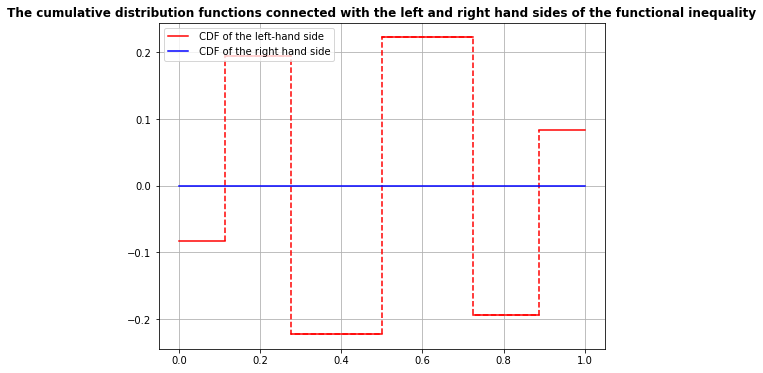

From Step 2, we obtain the number of the crossing points of these functions to be 5.

Since the number of crossing points is equal to 5 then we know that the functional inequality is satisfied by every 5-convex function f.

- The time taken to solve the problem is 0.79 seconds -


In [7]:
Linear_inequality((4/9)*(f((x+y)/2))+\
                  (5/18)*(f(((5+sqrt(15))/10)*x + ((5-sqrt(15))/10)*y)+f(((5-sqrt(15))/10)*x + ((5+sqrt(15))/10)*y))-\
                  (1/12)*(f(x) +f(y)) -\
                  (5/12)*f(((5+sqrt(5))/10)*x + ((5-sqrt(5))/10)*y)-\
                  (5/12)*f(((5-sqrt(5))/10)*x + ((5+sqrt(5))/10)*y))

**Example 5:**  Consider the inequality $G_3(f) \leq L_5(f),$
<br>
<br>
$$\textstyle\frac{4}{45}f\left(\frac{x+y}{2}\right)+ \frac{5}{18}\left[f\left(\frac{5+\sqrt15}{10}x + \frac{5-\sqrt15}{10}y\right) + f\left(\frac{5-\sqrt15}{10}x + \frac{5+\sqrt15}{10}y\right)\right]-\frac{1}{20}\left(f(x)+f(y)\right)- \frac{49}{180}\left[f\left(\frac{7+\sqrt21}{14}x + \frac{7-\sqrt21}{14}y\right) + f\left(\frac{7-\sqrt21}{14}x + \frac{7+\sqrt21}{14}y\right)\right]\\
\leq 0$$

By Step 1, every solution of the functional inequality must be a 5-convex functions.



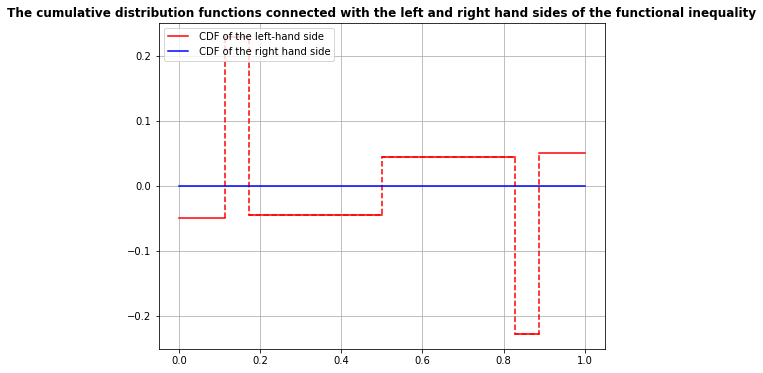

From Step 2, we obtain the number of the crossing points of these functions to be 5.

Since the number of crossing points is equal to 5 then we know that the functional inequality is satisfied by every 5-convex function f.

- The time taken to solve the problem is 0.74 seconds -


In [8]:
Linear_inequality((4/45)*(f((x+y)/2))+\
                  (5/18)*(f(((5+sqrt(15))/10)*x + ((5-sqrt(15))/10)*y)+f(((5-sqrt(15))/10)*x + ((5+sqrt(15))/10)*y))\
                  -(1/20)*(f(x) +f(y)) -\
                  (49/180)*(f(((7+sqrt(21))/14)*x + ((7-sqrt(21))/14)*y)+f(((7-sqrt(21))/14)*x + ((7+sqrt(21))/14)*y)))

**Example 6:**  Consider the inequality $L_5(f) \leq L_4(f),$
<br>
<br>
$$\textstyle   \frac{16}{45}f\left(\frac{x+y}{2}\right)+ \frac{49}{180}\left[f\left(\frac{7+\sqrt21}{14}x + \frac{7-\sqrt21}{14}y\right) + f\left(\frac{7-\sqrt21}{14}x + \frac{7+\sqrt21}{14}y\right)\right] -\frac{1}{30}\left(f(x)+f(y)\right) - \frac{5}{12}\left[f\left(\frac{5+\sqrt5}{10}x + \frac{5-\sqrt5}{10}y\right) + f\left(\frac{5-\sqrt5}{10}x + \frac{5+\sqrt5}{10}y\right)\right] \leq 0$$

By Step 1, every solution of the functional inequality must be a 5-convex functions.



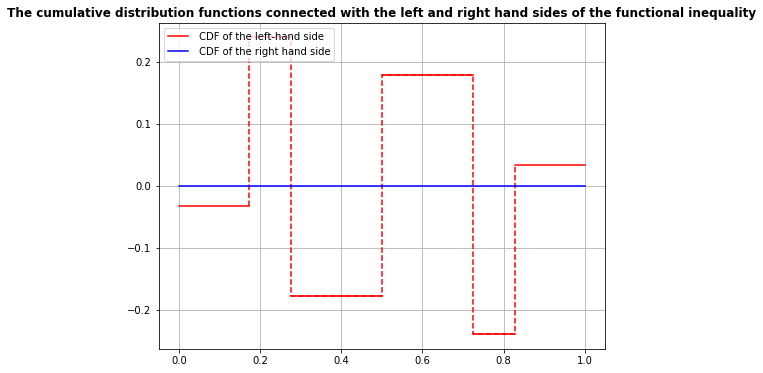

From Step 2, we obtain the number of the crossing points of these functions to be 5.

Since the number of crossing points is equal to 5 then we know that the functional inequality is satisfied by every 5-convex function f.

- The time taken to solve the problem is 0.57 seconds -


In [10]:
Linear_inequality((16/45)*(f((x+y)/2))+\
                   (49/180)*(f(((7+sqrt(21))/14)*x + ((7-sqrt(21))/14)*y)+f(((7-sqrt(21))/14)*x + ((7+sqrt(21))/14)*y))-\
                  (1/30)*(f(x) +f(y)) -\
                  (5/12)*(f(((5+sqrt(5))/10)*x + ((5-sqrt(5))/10)*y)+f(((5-sqrt(5))/10)*x + ((5+sqrt(5))/10)*y)))

**Example 7:**  Consider the inequality $C_3(f) \leq G_3(f),$
<br>
$$\textstyle \frac{1}{3}\left[f\left(\frac{2+\sqrt2}{4}x+\frac{2-\sqrt2}{4}y\right) + f\left(\frac{2-\sqrt2}{4}x+\frac{2+\sqrt2}{4}y\right)\right]-\frac{1}{9}f\left(\frac{x+y}{2}\right)- \frac{5}{18}\left[f\left(\frac{5+\sqrt15}{10}x + \frac{5-\sqrt15}{10}y\right) + f\left(\frac{5-\sqrt15}{10}x + \frac{5+\sqrt15}{10}y\right)\right]\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



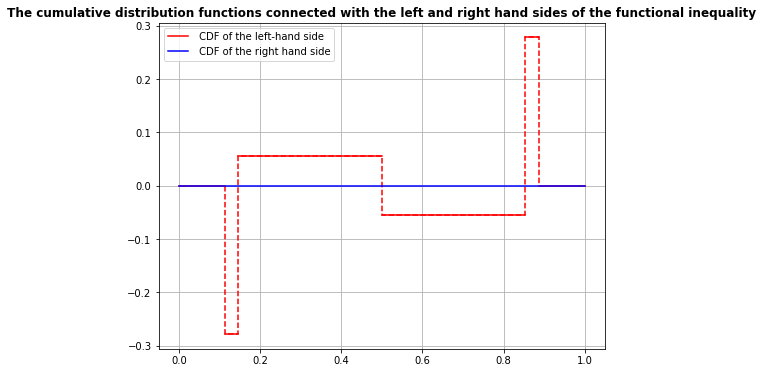

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.67 seconds -


In [11]:
Linear_inequality((1/3)*(f(((2+sqrt(2))/4)*x + ((2-sqrt(2))/4)*y)\
                    + f(((2-sqrt(2))/4)*x + ((2+sqrt(2))/4)*y))\
                 -(1/9)*(f((x+y)/2)) -\
                   (5/18)*(f(((5+sqrt(15))/10)*x + ((5-sqrt(15))/10)*y)+f(((5-sqrt(15))/10)*x + ((5+sqrt(15))/10)*y)))

**Example 8:**  Consider the inequality $C_3(f) \leq L_5(f),$
<br>
$$\textstyle \frac{1}{3}\left[f\left(\frac{2+\sqrt2}{4}x+\frac{2-\sqrt2}{4}y\right) + f\left(\frac{2-\sqrt2}{4}x+\frac{2+\sqrt2}{4}y\right)\right]-\frac{1}{45}f\left(\frac{x+y}{2}\right)-\frac{1}{20}\left(f(x)+f(y)\right)- \frac{49}{180}\left[f\left(\frac{7+\sqrt21}{14}x + \frac{7-\sqrt21}{14}y\right) + f\left(\frac{7-\sqrt21}{14}x + \frac{7+\sqrt21}{14}y\right)\right]\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



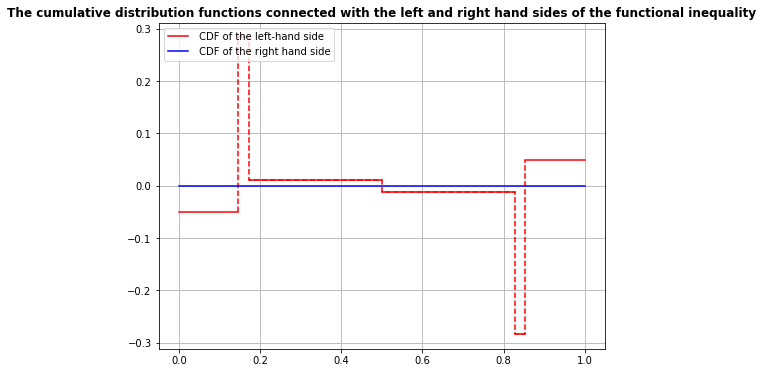

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.63 seconds -


In [12]:
Linear_inequality((1/3)*(f(((2+sqrt(2))/4)*x + ((2-sqrt(2))/4)*y)\
                    + f(((2-sqrt(2))/4)*x + ((2+sqrt(2))/4)*y))\
                    -(1/45)*(f((x+y)/2)) -(1/20)*(f(x)+f(y))-\
                    (49/180)*(f(((7+sqrt(21))/14)*x + ((7-sqrt(21))/14)*y)+f(((7-sqrt(21))/14)*x + ((7+sqrt(21))/14)*y)))

**Example 9:**  Consider the inequality $L_4(f) \leq S(f),$
<br>
$$\textstyle  \frac{5}{12}\left[f\left(\frac{5+\sqrt5}{10}x + \frac{5-\sqrt5}{10}y\right) + f\left(\frac{5-\sqrt5}{10}x + \frac{5+\sqrt5}{10}y\right)\right] -\frac{1}{12}\left(f(x)+f(y)\right)-\frac{2}{3}f\left(\frac{x+y}{2}\right) \leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



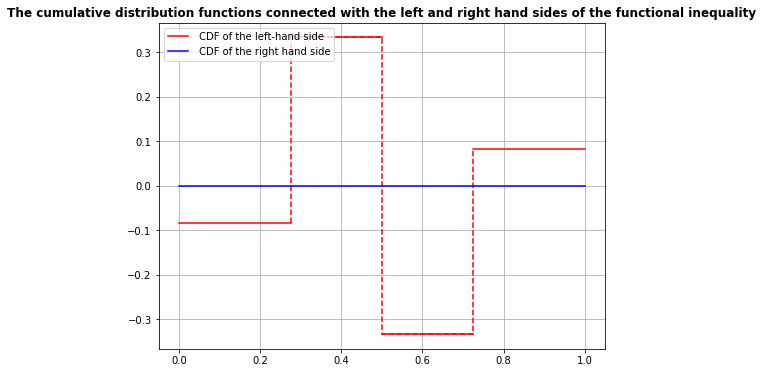

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.44 seconds -


In [13]:
Linear_inequality((5/12)*(f(((5+sqrt(5))/10)*x + ((5-sqrt(5))/10)*y)+f(((5-sqrt(5))/10)*x + ((5+sqrt(5))/10)*y))\
                 -(1/12)*(f(x) +f(y))-(2/3)*(f((x+y)/2))  )

**Example 10:**  Consider the inequality $G_3(f) \leq S(f),$
<br>
$$\textstyle \frac{5}{18}\left[f\left(\frac{5+\sqrt15}{10}x + \frac{5-\sqrt15}{10}y\right) + f\left(\frac{5-\sqrt15}{10}x + \frac{5+\sqrt15}{10}y\right)\right] -\frac{1}{6}\left(f(x)+f(y)\right)-\frac{2}{9}f\left(\frac{x+y}{2}\right)\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



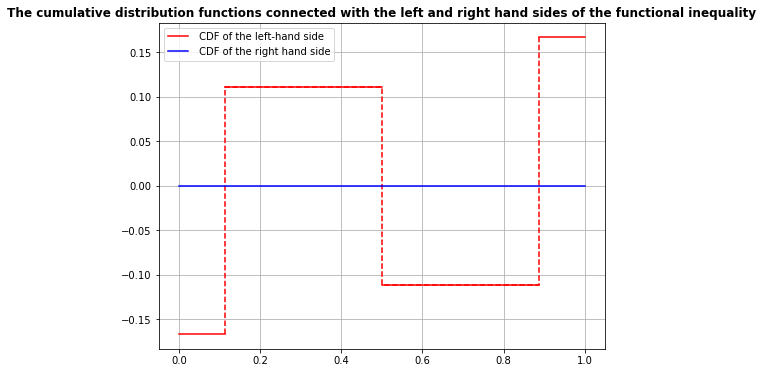

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.5 seconds -


In [14]:
Linear_inequality((5/18)*(f(((5+sqrt(15))/10)*x + ((5-sqrt(15))/10)*y)+f(((5-sqrt(15))/10)*x + ((5+sqrt(15))/10)*y))\
                 -(1/6)*(f(x) +f(y))-(2/9)*(f((x+y)/2))  )

**Example 11:**  Consider the inequality $L_5(f) \leq S(f),$
<br>
$$\textstyle  \frac{49}{180}\left[f\left(\frac{7+\sqrt21}{14}x + \frac{7-\sqrt21}{14}y\right) + f\left(\frac{7-\sqrt21}{14}x + \frac{7+\sqrt21}{14}y\right)\right]-\frac{7}{60}\left(f(x)+f(y)\right)-\frac{14}{45}f\left(\frac{x+y}{2}\right)\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



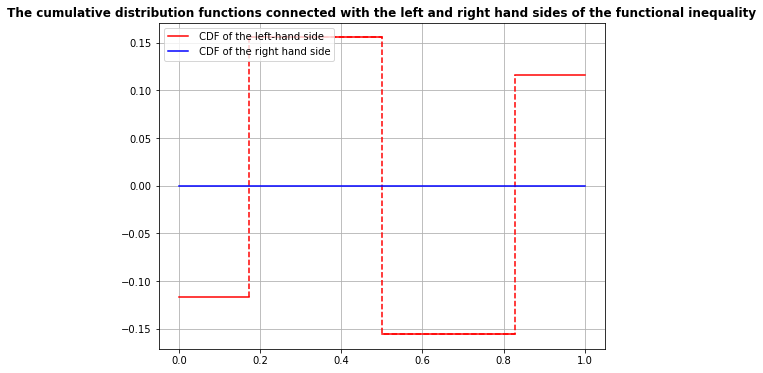

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.5 seconds -


In [15]:
Linear_inequality((49/180)*(f(((7+sqrt(21))/14)*x + ((7-sqrt(21))/14)*y)+f(((7-sqrt(21))/14)*x + ((7+sqrt(21))/14)*y))\
                 -(7/60)*(f(x) +f(y))-(14/45)*(f((x+y)/2)))

**Example 12:**  Consider the inequality $G_2(f) \leq C_3(f),$
<br>
$$\textstyle \frac{1}{2}\left[f\left(\frac{3+\sqrt3}{6}x + \frac{3-\sqrt3}{6}y\right) + f\left(\frac{3-\sqrt3}{6}x + \frac{3+\sqrt3}{6}y\right)\right] -\frac{1}{3}\left[f\left(\frac{2+\sqrt2}{4}x+\frac{2-\sqrt2}{4}y\right) +f\left(\frac{x+y}{2}\right)+ f\left(\frac{2-\sqrt2}{4}x+\frac{2+\sqrt2}{4}y\right)\right]\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-convex functions.



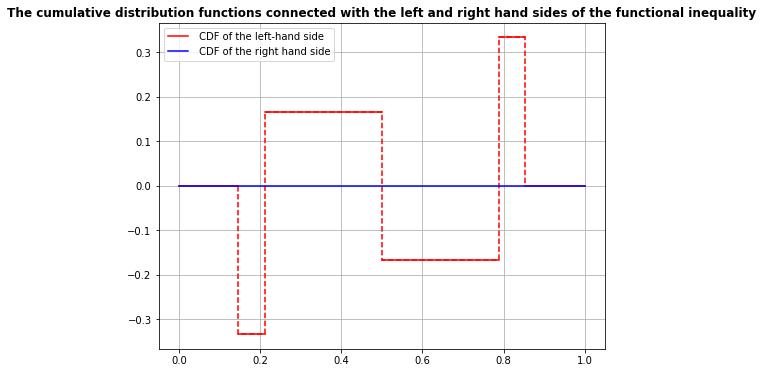

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing points is equal to 3 then we know that the functional inequality is satisfied by every 3-convex function f.

- The time taken to solve the problem is 0.67 seconds -


In [16]:
Linear_inequality((1/2)*(f(((3+sqrt(3))/6)*x + ((3-sqrt(3))/6)*y)+ f(((3-sqrt(3))/6)*x + ((3+sqrt(3))/6)*y))\
                  -(1/3)*(f(((2+sqrt(2))/4)*x + ((2-sqrt(2))/4)*y)\
                   + f((x+y)/2) + f(((2-sqrt(2))/4)*x + ((2+sqrt(2))/4)*y)))

**Example 13:**  cf. Example 3 in [29]) Consider the inequality(
<br>
$$\textstyle f\left(\frac{2+\sqrt6}{4}x+\frac{2-\sqrt6}{4}y\right) +f\left(\frac{x+y}{2}\right)+ f\left(\frac{2-\sqrt6}{4}x+\frac{2+\sqrt6}{4}y\right) -\frac{3}{2}\left(f(x)+f(y)\right)\leq 0$$

By Step 1, every solution of the functional inequality must be a 3-concave functions.



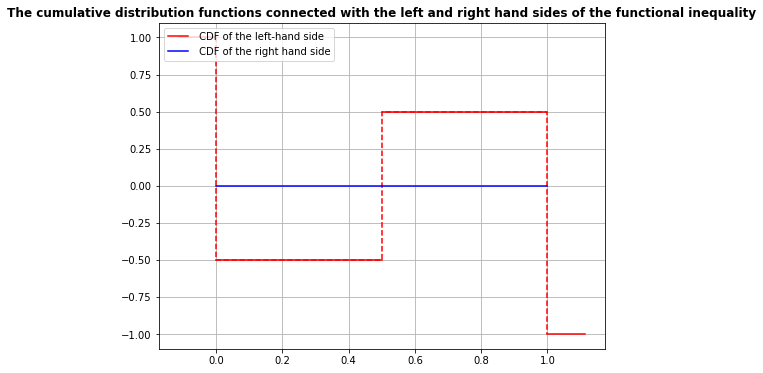

From Step 2, we obtain the number of the crossing points of these functions to be 3.

Since the number of crossing point is equal to 3 then we know that the functional inequality is satisfied by every 3-concave function f.

- The time taken to solve the problem is 0.35 seconds -


In [24]:
Linear_inequality(f(((2+sqrt(6))/4)*x + ((2-sqrt(6))/4)*y)\
                   + f((x+y)/2) + f(((2-sqrt(6))/4)*x + ((2+sqrt(6))/4)*y)-(3/2)*(f(x) +f(y)))

**Example 14:** (cf. Example 4 in [29]) Consider the inequality
<br>
$$\textstyle f\left(\frac{-1}{5}x+\frac{6}{5}y\right) + f\left(\frac{2}{5}x+\frac{3}{5}y\right) -\frac{1}{5}f(x)-\frac{9}{5}f(y)\leq 0$$

By Step 1, every solution of the functional inequality must be a 2-concave functions.



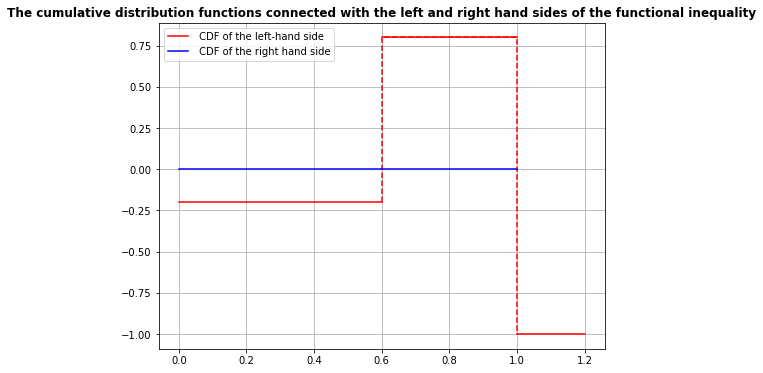

From Step 2, we obtain the number of the crossing points of these functions to be 2.

Since the number of crossing point is equal to 2 then we know that the functional inequality is satisfied by every 2-concave function f.

- The time taken to solve the problem is 0.18 seconds -


In [25]:
Linear_inequality(f((-1/5)*x + (6/5)*y)\
                   + f((2/5)*x + (3/5)*y)-(1/5)*(f(x)) -(9/5)*(f(y)))